### 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
- 머신러닝 전체 과정을 진행해보자

#### 1. 문제 정의
- 생존/사망을 예측
- kaggle 경진대회에서 높은 순위를 차지해보자

#### 2. 데이터 수집(불러와서 확인)

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화 라이브러리

- 타이타닉 train 데이터와 test 데이터를 불러와서 변수에 저장(PassengerId라는 컬럼을 인덱스 자리로 옮기면서 불러오기)

In [2]:
# csv -> pd.read_csv
train = pd.read_csv('./data/train.csv', index_col='PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('./data/test.csv', index_col = 'PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 크기 확인
print('훈련 데이터 크기 :', train.shape)
print('테스트 데이터 크기 :', test.shape)
# 컬럼의 개수가 다르다

훈련 데이터 크기 : (891, 11)
테스트 데이터 크기 : (418, 10)


#### 3. 데이터 전처리 및 데이터 탐색

In [5]:
train.info()
# 결측치가 있는 컬럼 : Age, Cabin, Embarked
# 데이터 타입 : 숫자(정수, 실수), 문자
# 모델링을 할 때 모델은 숫자데이터만 인식
# 문자 -> 숫자 : 인코딩(라벨인코딩, 원핫인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test.info()
# Survived 컬럼이 없다! -> 우리가 맞춰야하는 답 데이터
# y_test는 어디있을까? --> kaggle이 알고 있다
# 결측치가 있는 컬럼 : Age, Fare, Cabin
# 데이터 타입 : 숫자(정수, 실수), 문자열

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [7]:
# 컬럼 정보 정리
train.columns
# 'Survived' : 생존/사망 결과값이 담긴 컬럼 (정답데이터) -> 0:사망, 1:생존
# 'Pclass' : 승객 등급 -> 1:상위층, 2:중상위층, 3:하위층
# 'Name'
# 'Sex'
# 'Age'
# 'SibSp' : 형제, 자매, 배우자의 수 (같이 탑승한)
# 'Parch' : 부모/자식의 수 (같이 탑승한)
# 'Ticket' : 티켓번호
# 'Fare' : 요금
# 'Cabin' : 객실번호
# 'Embarked' : 승선항 -> S:Southampton, C:Cherbourg, Q:Queenstown 

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- train : Embarked 컬럼 결측치 채우기

In [8]:
# 데이터 확인 -> train 기준으로 확인
# 좋은 모델을 만드려면 학습 데이터를 잘 구비해야한다. 
# train에서 embarked 컬럼 인덱싱 -> S, C, Q가 몇 개씩 있는지 확인
# 결측치 채우는 방법 
# 1. 제거(제거해도 데이터에 영향이 미미)
# 2. 임의의 값으로 채워넣기(중앙값, 평균값, 최빈값)
train['Embarked'].value_counts()  # S에서 제일 많이 탑승했다

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
# 결측치 몇 개? -> 2개
train['Embarked'].isnull().sum()  # 불리언 인덱싱의 재료!!
# train['Embarked'] 결측치가 있는 데이터 출력하기
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
# 두 사람의 데이터가 서로 비슷
# -> 같은 승선항에서 탔을 것이라고 가정
# 사람이 가장 많이 탑승한 장소의 승선항 값으로 채워보기
# 1. 인덱싱을 하나씩 해서 접근 -> 값을 수정 
# 2. NaN 값(비어있는 값)을 모두 찾아서 대체해주는 함수를 사용 : fillna(값)
# 결측치가 있는 자리에 값을 초기화해서 대입 
train['Embarked'] = train['Embarked'].fillna('S')

In [11]:
train['Embarked'].isnull().sum()  # -> NaN값이 채워졌구나!

0

- test데이터에 있는 Fare 컬럼 결측치 채우기

In [12]:
# test 데이터에서 Fare 컬럼 인덱싱한 후 결측치가 존재하는 행 출력하기
# test['Fare'].isnull().sum()
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [13]:
# Pclass 혹은 성별 혹은 도시와 연관이 되지 않았을까?
# 상관관계 확인
train.corr(numeric_only = True) # 문자열로 된 컬럼 포함 -> 상관계수 X 
# Fare컬럼과 연관이 있는 컬럼은 무엇일까? -> Pclass
# -1 ~ +1로 표현되는 계수
# -1과 +1에 가까울수록 속성간에 관계가 깊다 
# 0에 가까울수록 상대적으로 관계가 깊지 않다(적음)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
# train데이터의 Fare 컬럼 기술통계량 확인
# describe()
# 중앙값, 평균값 중에 대표값으로 설정할 값을 찾기 위해
train['Fare'].describe()  # 평균값이 아닌 중앙값을 대표값으로 선택

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
# Pclass, Sex -> Fare 중앙, 평균 값으로 결측치를 대체해보자
# 1. female -> Fare 중앙 값, 평균 값을 확인하고 해당 값으로 채워보자
# 2. male -> Fare 값을 채워보자
# 3. test['Fare'] 3등급, 남성 승객의 중앙값
# train 데이터를 기준으로 승객 등급, 성별 그룹핑(groupby)
# 중앙값 median() -> 써주지 않으면 그룹화 되었다고만 나온다
# train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']) 
train[['Pclass', 'Sex', 'Fare']].groupby(['Pclass', 'Sex']).median()

Fare
Pclass Sex             
1      female  82.66455
       male    41.26250
2      female  22.00000
       male    13.00000
3      female  12.47500
       male     7.92500

In [16]:
# test['Fare'] 결측치를 채워주자 -> 7.925 (Pclass : 3, Sex : male)
test['Fare'] = test['Fare'].fillna('7.925')
test['Fare'].isna().sum() # 처리 확인

0

- Age 결측치 채우기
    - train, test 모두 처리
    - 나이의 평균, 중앙값으로 결측치를 채워보자
    - 다른 컬럼과의 상관관계를 이용하여 결측치 채워보기

In [17]:
# 기술통계량
# 중앙값 vs 평균값? -> 평균값(mean)
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [19]:
# Age 컬럼과 상관관계가 높은 컬럼 찾아보기! -> Pclass
# train.corr(numeric_only = True)['Age']
# train.corr(numeric_only = True)['Age'].sort_values(ascending=True)
train.corr(numeric_only = True)['Age'].abs().sort_values(ascending=True)  # abs() : 절대값

Survived    0.077221
Fare        0.096067
Parch       0.189119
SibSp       0.308247
Pclass      0.369226
Age         1.000000
Name: Age, dtype: float64

In [20]:
# Pclass, Sex, Age 컬럼의 평균값 출력해보기
# female, age 평균
# male, age 평균
gb1 = train[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [21]:
# gb1 3등급, male 나이 평균값 접근해보기
# 멀티인덱스 접근방법
# gb1.loc[3]
gb1.loc[(3, 'male')]  # 튜플 단위로 묶어주기

Age    26.507589
Name: (3, male), dtype: float64

In [22]:
# 1등급 여성 나이 평균 출력해보기
gb1.loc[1, 'female']

Age    34.611765
Name: (1, female), dtype: float64

In [23]:
train[train['Age'].isnull()]['Pclass'].value_counts()

Pclass
3    136
1     30
2     11
Name: count, dtype: int64

In [24]:
train[train['Age'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [25]:
# 결측치를 채우기 위해서 각 승객의 등급, 성별을 확인한 후 
# Age 평균값을 인덱싱하여 채움
def pre_age(row):
    # 만약 나이가 결측치라면, 값을 가져오고 row에는 한사람의 정보가 담긴다.
    if np.isnan(row['Age']): # 결측치를 확인하는 함수 == np.isnan(대상)
        return gb1.loc[(row['Pclass'],row['Sex'])]
    # 만약 나이가 결측치가 아니라면, 원래 나이값을 그대로 사용
    else : 
        return row['Age']
    
# apply() : 다차원으로 되어있는 데이터에 모두 적용시키는 함수
train['Age'] = train.apply(pre_age, axis = 1) 
train['Age'].isnull().sum()

0

In [26]:
# test 데이터의 Age 컬럼 결측치도 처리
test['Age'] = test.apply(pre_age, axis = 1)
test['Age'].isnull().sum()

0

In [27]:
# 멀티인덱싱을 해서 'Age 21.2435' 이런식으로 들어가있음 
# 숫자만 들어가도록 바꿔주기
train['Age'] = train['Age'].astype('int64')
test['Age'] = test['Age'].astype('int64')
test['Age'].dtype

C:\Users\SMHRD\AppData\Local\Temp\ipykernel_15240\1689539054.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  train['Age'] = train['Age'].astype('int64')
C:\Users\SMHRD\AppData\Local\Temp\ipykernel_15240\1689539054.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test['Age'] = test['Age'].astype('int64')


dtype('int64')

- train, test : Cabin(객실번호) 채우기

In [28]:
# train['Cabin'] 결측치는 몇 개 있을까?
train['Cabin'].isnull().sum()

687

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [30]:
# 중복없이 값 확인
# unique()
train['Cabin'].unique()
# 생김새 : 층 + 방번호 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
train.columns  
# Pclass도 객실을 나타냄 -> 다시 할 필요는 없을 듯.

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
# Cabin의 결측치를 임의로 'M'값으로 채워보기
# fillna()로 결측치를 처리한 후 Deck 컬럼을 생성해서 담기
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [33]:
# Deck 컬럼에서 맨 첫글자 알파벳만 추출하기
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [34]:
# Cabin 컬럼 삭제
# drop()
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [35]:
# 결측치 제거 다 됐는지 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [36]:
# 결측치 제거 다 됐는지 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Name      418 non-null    object
 2   Sex       418 non-null    object
 3   Age       418 non-null    int64 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Ticket    418 non-null    object
 7   Fare      418 non-null    object
 8   Embarked  418 non-null    object
 9   Deck      418 non-null    object
dtypes: int64(4), object(6)
memory usage: 35.9+ KB


#### 데이터 탐색

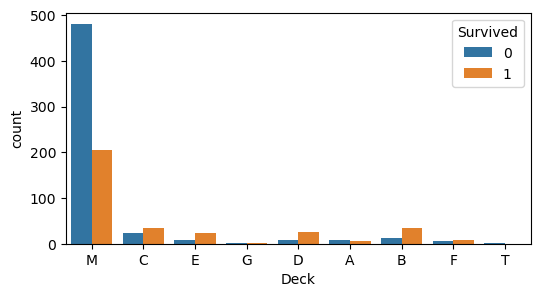

In [37]:
# Deck 컬럼과 Survived 컬럼의 연관성 확인
# 막대그래프 활용 
plt.figure(figsize = (6,3))
sns.countplot(data = train, x = 'Deck', hue = 'Survived')
plt.show()

In [38]:
# M에서 상대적으로 많은 사람들이 사망했다
# Survived에 영향을 주지는 않을까?

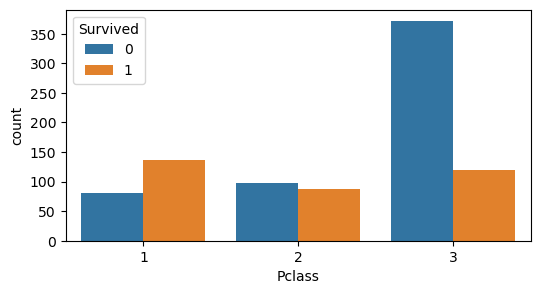

In [39]:
# Pclass와 Survived 시각화 
# countplot
# 생존/사망 의미 파악해보기
plt.figure(figsize=(6,3))
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.show()

In [40]:
# 1등급 - 비교적 생존율 높음
# 2등급 - 사망율이 생존율보다 조금 높다
# 3등급 - 사망율이 월등히 높다

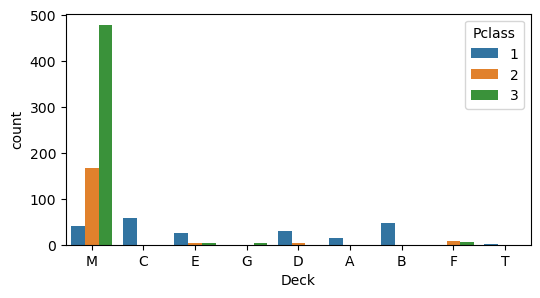

In [41]:
# Deck와 Pclass를 연관지어서 시각화
# X = Deck
# hue = Pclass
plt.figure(figsize = (6,3))
sns.countplot(data = train, x = 'Deck', hue = 'Pclass')
plt.show()

In [42]:
# M에서 사망율이 높았던 건 3등급의 사람이 많아서였음
# Deck라는 컬럼이 생존/사망에 크게 영향을 주고 있는 것은 아니다
# 오히려 Pclass는 영향을 크게 미치고 있다. 

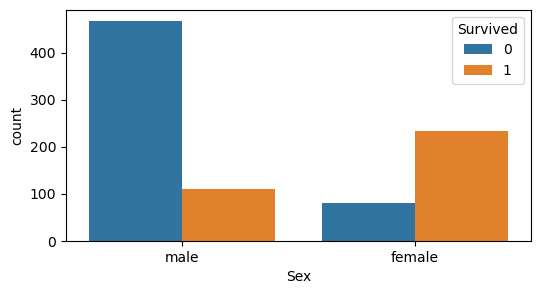

In [43]:
# Sex와 Survived의 시각화
plt.figure(figsize = (6,3))
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
plt.show()

In [44]:
# 남성은 상대적으로 사망율이 높음
# 여성은 상대적으로 생존율이 높음
# 생존/사망을 판별하는데 성별은 도움이 되겠다!

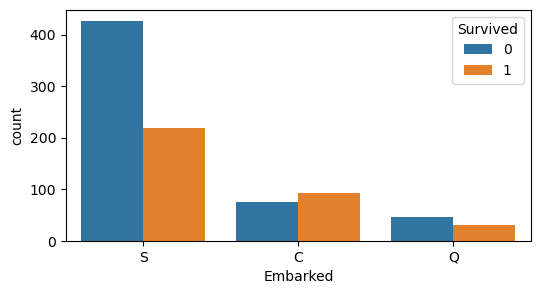

In [45]:
# Embarked와 Survived의 관계 시각화
plt.figure(figsize = (6,3))
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')
plt.show()

In [46]:
# 승선항이 생존과 사망에 영향을 미쳤는지 아닌지 확고한 증거가 없다. 

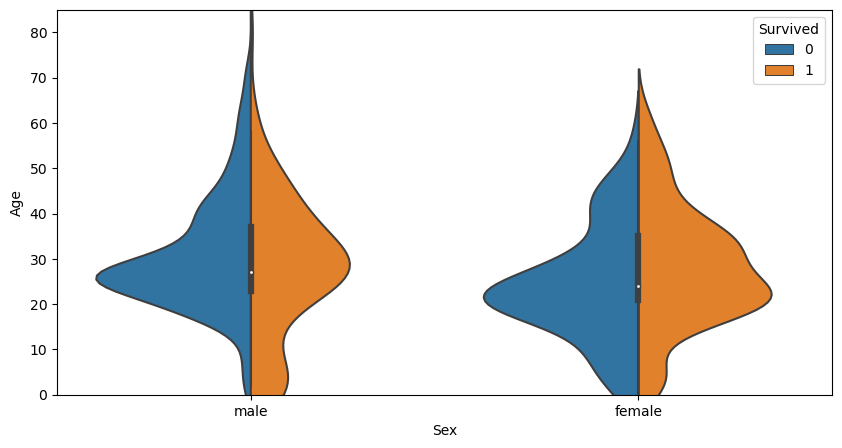

In [47]:
# Age와 Survived 연관성 확인하기
# violin plot - 바이올린 플롯
# 바이올린 플롯 -> 데이터의 분포를 확인할 때 사용하는 그래프
plt.figure(figsize = (10,5))
sns.violinplot(data = train, 
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',  # Survived를 기준으로 수를 세어줌
              split = True)  # x축, y축 구분
plt.ylim(0,85)
plt.show()

In [48]:
# 20 ~ 40대에 해당하는 남자가 사망률 및 생존율이 높았다.
# 20대 초반에 해당하는 여자가 사망률 및 생존율이 높았다. 

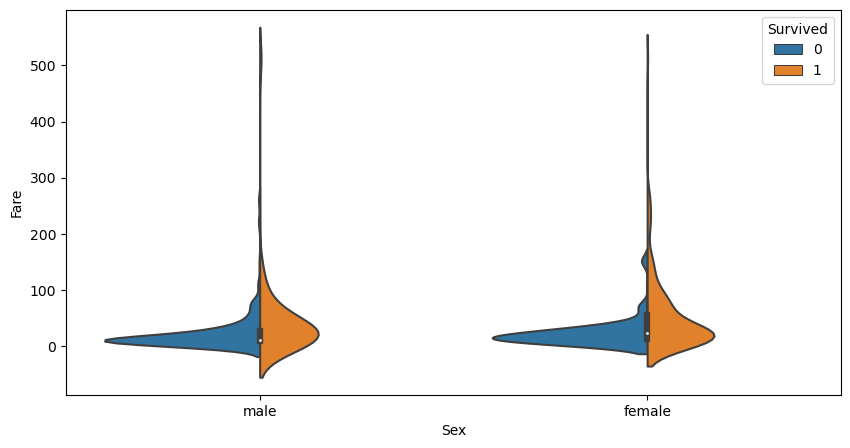

In [49]:
# 성별과 요금에 따른 생존율 분석 - violin plot 사용
plt.figure(figsize = (10,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Fare',
              hue = 'Survived',
              split = True)
plt.show()

In [50]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

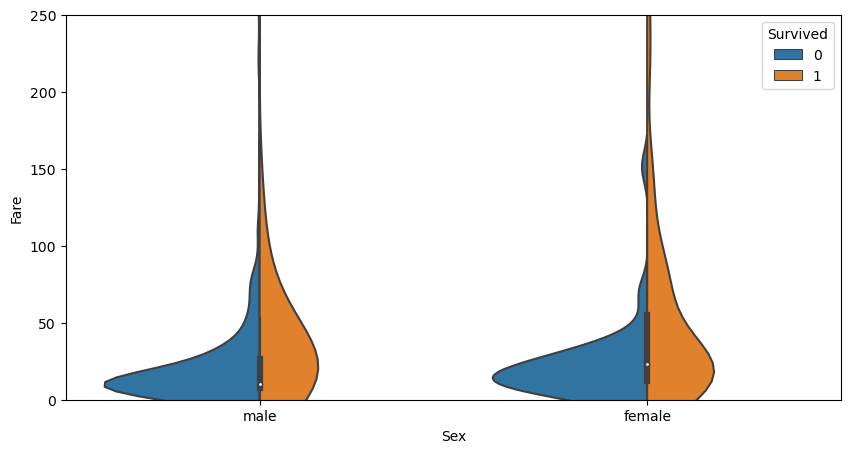

In [51]:
# 요금 0 이하, 250 이상은 별 의미가 없는 데이터이기 때문에 이상치 제외하기
plt.figure(figsize = (10,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Fare',
              hue = 'Survived',
              split = True)
plt.ylim(0,250)
plt.show()

In [52]:
# 저렴한 요금을 내고 탑승한 사람은 상대적으로 많이 사망함

In [53]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck'],
      dtype='object')

- Parch, SibSp - 부모자식, 형제자매·배우자
    - 특성공학 : 두 개의 컬럼을 더해서 가족의 숫자라는 새로운 컬럼 생성
    - train에서 생성하고 test에 동일하게 적용

In [54]:
# 새로운 컬럼 : 'Family_size' = Parch + SibSp + 1 

In [55]:
train['Family_size'] = train['Parch'] + train['SibSp'] + 1
test['Family_size'] = test['Parch'] + test['SibSp'] + 1

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Deck         891 non-null    object 
 11  Family_size  891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 90.5+ KB


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pclass       418 non-null    int64 
 1   Name         418 non-null    object
 2   Sex          418 non-null    object
 3   Age          418 non-null    int64 
 4   SibSp        418 non-null    int64 
 5   Parch        418 non-null    int64 
 6   Ticket       418 non-null    object
 7   Fare         418 non-null    object
 8   Embarked     418 non-null    object
 9   Deck         418 non-null    object
 10  Family_size  418 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 39.2+ KB


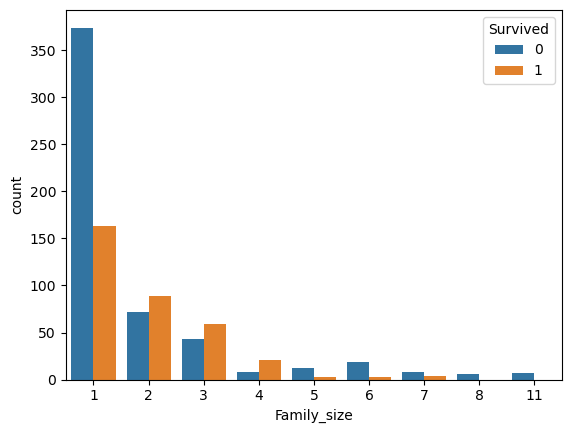

In [58]:
# 시각화
# countplot
sns.countplot(data = train, x = 'Family_size', hue = 'Survived')
plt.show()

In [59]:
# 1명 -> 사망률 -> 생존율
# 2 ~ 4 -> 사망률 < 생존율
# 5 이상 -> 사망률 > 생존율 

# 범주를 줄여주자 -> binning(사소한 관찰오류를 줄일 수 있다.)

In [60]:
# 가족사이즈가 1이면 Alone, 2~4명 small, 5명 이상 Large 
# train, test 적용
# pd.cut()
bins = [0, 1, 4, 11]
labels = ['Alone', 'Small', 'Large']
train['Family_group'] = pd.cut(train['Family_size'],
                              bins = bins, labels = labels)
train['Family_group']

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family_group, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [61]:
test['Family_group'] = pd.cut(test['Family_size'],
                              bins = bins, labels = labels)
test['Family_group']

PassengerId
892     Alone
893     Small
894     Alone
895     Alone
896     Small
        ...  
1305    Alone
1306    Alone
1307    Alone
1308    Alone
1309    Small
Name: Family_group, Length: 418, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

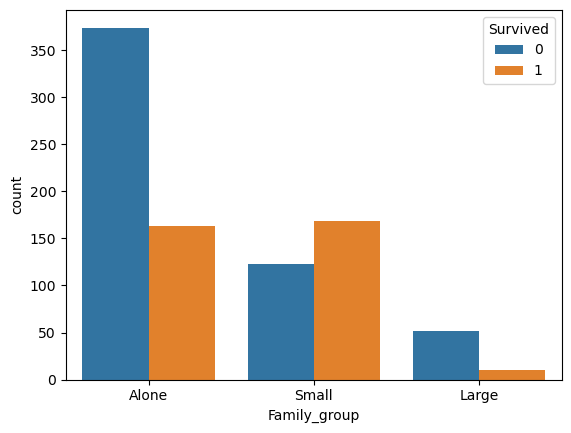

In [62]:
sns.countplot(data = train, x = 'Family_group',
             hue = 'Survived')
plt.show()

In [63]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck', 'Family_size', 'Family_group'],
      dtype='object')

- 불필요한 컬럼 삭제
    - Name, Ticket, Family_size 

In [64]:
# train (열단위 삭제)
train.drop(['Name', 'Ticket', 'Family_size'], axis = 1, inplace = True)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   Age           891 non-null    int64   
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    object  
 8   Deck          891 non-null    object  
 9   Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 70.6+ KB


In [66]:
# test
test.drop(['Name', 'Ticket', 'Family_size'], axis = 1, inplace = True)

In [67]:
test.info()

# 전처리 끝

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Sex           418 non-null    object  
 2   Age           418 non-null    int64   
 3   SibSp         418 non-null    int64   
 4   Parch         418 non-null    int64   
 5   Fare          418 non-null    object  
 6   Embarked      418 non-null    object  
 7   Deck          418 non-null    object  
 8   Family_group  418 non-null    category
dtypes: category(1), int64(4), object(4)
memory usage: 29.9+ KB


In [68]:
# 문제와 답 분리
X_train = train.drop('Survived', axis = 1) # Survived를 제외한 나머지 컬럼 -> 문제데이터
# X = train.loc[:, 'Pclass' :]  
y_train = train['Survived']
X_test = test

In [69]:
# 크기 확인
print('훈련 문제 크기 :', X_train.shape)
print('훈련 답 크기 :', y_train.shape)
print('테스트 문제 크기 :', X_test.shape)

훈련 문제 크기 : (891, 9)
훈련 답 크기 : (891,)
테스트 문제 크기 : (418, 9)


In [70]:
# 데이터 인코딩 (문자열 -> 수치화)
# 원핫인코딩

In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Age           891 non-null    int64   
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    object  
 7   Deck          891 non-null    object  
 8   Family_group  891 non-null    category
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 63.6+ KB


In [72]:
# 인코딩이 필요한 컬럼 : Object 자료형과 category 자료형
# c_choice = ['Sex', 'Embarked', 'Deck', 'Family_group'] => 수치화
c_fil = (X_train.dtypes != 'int64') & (X_train.dtypes != 'float64')
c_choice = X_train.columns[c_fil]
c_choice

Index(['Sex', 'Embarked', 'Deck', 'Family_group'], dtype='object')

In [73]:
# 원핫인코딩 
# pandas 라이브러리에서 제공하는 원핫인코딩 pd.get_dummies(대상)
X_train_ca_oh = pd.get_dummies(X_train[c_choice])
X_test_ca_oh = pd.get_dummies(X_test[c_choice])

# 원핫인코딩 된 컬럼을 X_train과 병합
# pd.concat()
X_train = pd.concat([X_train, X_train_ca_oh], axis = 1)
X_test = pd.concat([X_test, X_test_ca_oh], axis = 1)

# 원핫인코딩 하기 전에 범주형(문자열) 컬럼은 삭제
X_train.drop(c_choice, axis = 1, inplace = True)
X_test.drop(c_choice, axis = 1, inplace = True)

In [74]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_M,Deck_T,Family_group_Alone,Family_group_Small,Family_group_Large
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,False,True,False,False,True,...,False,False,False,False,False,True,False,False,True,False
2,1,38,1,0,71.2833,True,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
3,3,26,0,0,7.9250,True,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,1,35,1,0,53.1000,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
5,3,35,0,0,8.0500,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,0,0,13.0000,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
888,1,19,0,0,30.0000,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
889,3,21,1,2,23.4500,True,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False


In [75]:
# 크기 확인
X_train.shape, X_test.shape

((891, 22), (418, 21))

In [76]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [77]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large'],
      dtype='object')

In [78]:
# X_test에 'Deck_T' 컬럼이 없기 때문에
# 임의로 만들어서 의미없는 값으로 채워넣기
# True -> 1 / False -> 0
X_test['Deck_T'] = 0
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_group_Alone',
       'Family_group_Small', 'Family_group_Large', 'Deck_T'],
      dtype='object')

In [79]:
# X_train이 가진 컬럼의 순서를 X_test에 적용 -> 인덱싱한 후 다시 대입
X_test = X_test[X_train.columns]
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'Family_group_Alone', 'Family_group_Small', 'Family_group_Large'],
      dtype='object')

#### 모델 선택 및 학습

In [80]:
# tree 모델 불러오기
from sklearn.tree import DecisionTreeClassifier 

In [81]:
# 모델 객체 생성
tree_model = DecisionTreeClassifier()   # max_depth 없이 모델 생성

In [82]:
# 모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
# 모델 예측
pre = tree_model.predict(X_test)
pre

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [84]:
# kaggle 사이트에 예측한 pre값 제출하여 정확도 알아보기
# gender_submission 파일 불러오기 -> Survived 컬럼을 예측값으로 변경
# 예측값을 담은 df을 csv파일로 저장
result = pd.read_csv('./data/gender_submission.csv')
result['Survived'] = pre
result.to_csv('./data/submission01_s.csv', index = False)

In [85]:
# 과대적합 키워드를 설정하여 모델 학습 후 예측 
# kaggle에 재제출
# 나무의 깊이 max_depth = 5
tree_model2 = DecisionTreeClassifier(max_depth = 5)

In [86]:
# 해당 모델의 성능이 얼마나 되는지 확인하는 방법
# 교차검증 cv = 5
from sklearn.model_selection import cross_val_score
cv_result1 = cross_val_score(tree_model, X_train, y_train, cv = 5)
cv_result2 = cross_val_score(tree_model2, X_train, y_train, cv = 5)
print("1번째 모델 :", cv_result1)
print("1번째 모델 검증 평균 :", cv_result1.mean())
print("2번째 모델 :", cv_result2)
print("2번째 모델 검증 평균 :", cv_result2.mean())

1번째 모델 : [0.75418994 0.78651685 0.84831461 0.76966292 0.79213483]
1번째 모델 검증 평균 : 0.7901638315234448
2번째 모델 : [0.81564246 0.78089888 0.8258427  0.76966292 0.86516854]
2번째 모델 검증 평균 : 0.8114430983616847


In [87]:
# tree_model2 학습, 예측
tree_model2.fit(X_train, y_train)
pre2 = tree_model2.predict(X_test)

# kaggle 업로드
result2 = pd.read_csv('./data/gender_submission.csv')
result2['Survived'] = pre2
result2.to_csv('./data/submission02_s.csv', index = False)

In [88]:
tree_model3 = DecisionTreeClassifier(max_depth = 3)
tree_model3.fit(X_train, y_train)
pre3 = tree_model3.predict(X_test)

result3 = pd.read_csv('./data/gender_submission.csv')
result3['Survived'] = pre3
result3.to_csv('./data/submission03_s.csv', index = False)

In [89]:
from sklearn.model_selection import cross_val_score
cv_result3 = cross_val_score(tree_model3, X_train, y_train, cv = 5)
cv_result3

array([0.81005587, 0.80898876, 0.80337079, 0.78089888, 0.80337079])

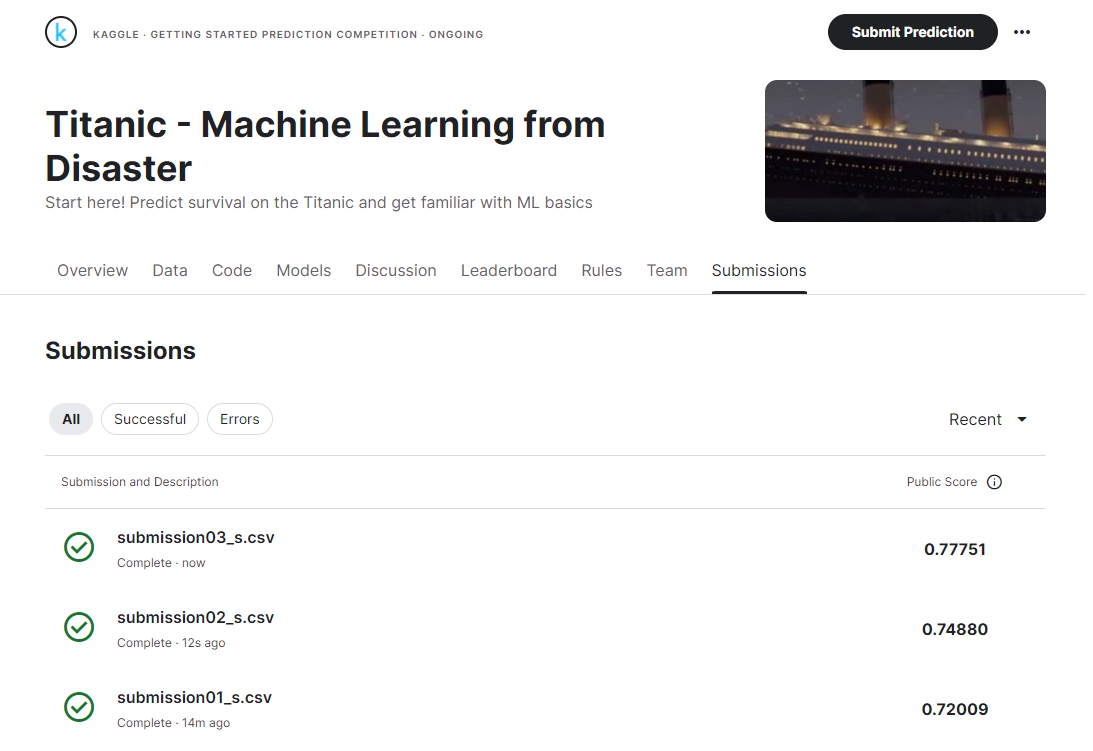

In [90]:
# tree_model 특성 중요도값 확인해보기
fi = tree_model.feature_importances_
fi  # --> array 형태

array([0.08608388, 0.23523756, 0.01165259, 0.01046191, 0.21003528,
       0.30857231, 0.        , 0.00515905, 0.00045784, 0.00614277,
       0.        , 0.00360721, 0.00338928, 0.0033891 , 0.00927335,
       0.00247996, 0.        , 0.03744313, 0.        , 0.00808388,
       0.03360412, 0.02492678])

In [91]:
# Series 형태로 형변환
fi_s = pd.Series(fi, index = X_train.columns)
fi_s.sort_values(ascending = False)

Sex_female            0.308572
Age                   0.235238
Fare                  0.210035
Pclass                0.086084
Deck_M                0.037443
Family_group_Small    0.033604
Family_group_Large    0.024927
SibSp                 0.011653
Parch                 0.010462
Deck_E                0.009273
Family_group_Alone    0.008084
Embarked_S            0.006143
Embarked_C            0.005159
Deck_B                0.003607
Deck_C                0.003389
Deck_D                0.003389
Deck_F                0.002480
Embarked_Q            0.000458
Deck_A                0.000000
Sex_male              0.000000
Deck_G                0.000000
Deck_T                0.000000
dtype: float64

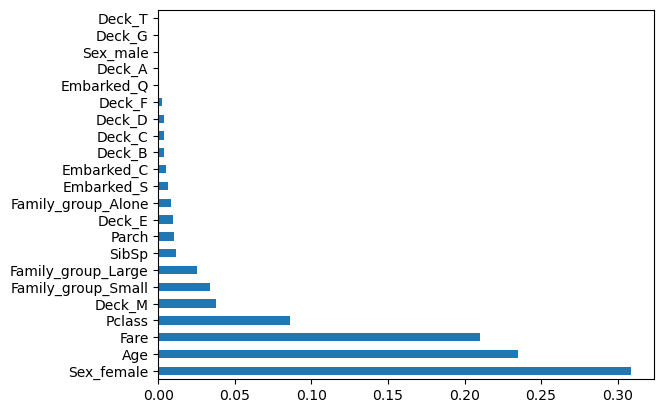

In [92]:
fi_s.sort_values(ascending = False).plot.barh()
plt.show()

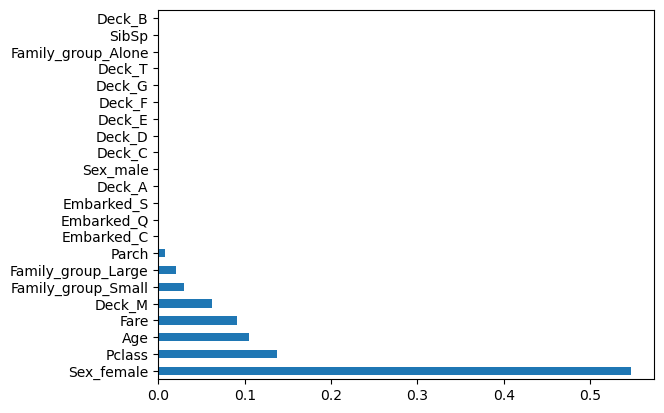

In [93]:
# tree_model2 특성 중요도값 확인해보기
fi = tree_model2.feature_importances_
fi

fi_s = pd.Series(fi, index = X_train.columns)
fi_s.sort_values(ascending = False)

fi_s.sort_values(ascending = False).plot.barh()
plt.show()

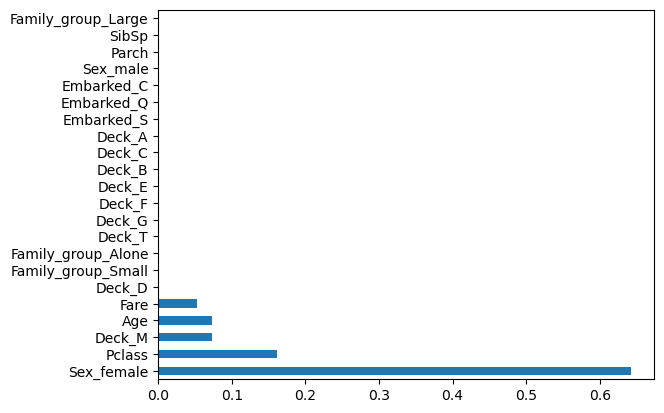

In [94]:
# tree_model3 특성 중요도값 확인해보기
fi3 = tree_model3.feature_importances_

fi3_s = pd.Series(fi3, index = X_train.columns)
fi3_s.sort_values(ascending = False)

fi3_s.sort_values(ascending = False).plot.barh()
plt.show()

- gender_submission은 오직 성별로만 생존/사망을 예측한 것
-  → 머신러닝으로 여러 가지 질문을 학습해서 예측한 것보다 정확도가 높음
-  → 원인1) 성별이 중요도가 굉장히 높으므로, 다른 질문들은 그렇게 중요하지 않음
-  → 원인2) 약 900개의 표본은 너무 적음.

### 앙상블 모델 적용해보기
- 베깅 : RandomForest
- 부스팅 : AdaBoost, Gradient Boost, XG Boost, LightGBM

In [95]:
# 베깅 - RandomForest
# 모델 import
from sklearn.ensemble import RandomForestClassifier 

In [96]:
# 모델 객체 생성
rf_model = RandomForestClassifier(n_estimators=200, # 나무의 갯수
                       max_depth=5,)  # 트리의 깊이
# 하이퍼 파라미터 튜닝 : 세부조정(기성품인 모델을 데이터에 잘 맞도록 조정)

In [97]:
# 모델 교차검증
# cross_val_score(모델, X_train, y_train, cv = 데이터 분할 개수)
cv_rf = cross_val_score(rf_model, X_train, y_train, cv = 5)
print(cv_rf)
print(cv_rf.mean())

[0.82122905 0.8258427  0.83707865 0.80898876 0.8258427 ]
0.8237963718536188


In [98]:
# 모델 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [100]:
# 학습된 모델로 예측 진행하기
pre = rf_model.predict(X_test)
pre

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
rs = pd.read_csv('./data/gender_submission.csv')

In [103]:
rs['Survived'] = pre

In [104]:
rs

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [105]:
# 제출 파일 만들기
rs.to_csv('data/rf_model1.csv', index=False)

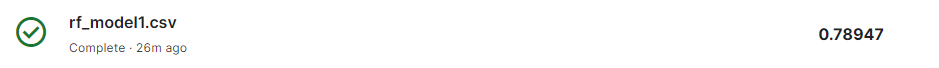

In [126]:
# 부스팅 알고리즘 사용해보기 - AdaBoosting / Gradient Boost
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.ensemble import GradientBoostingClassifier

In [127]:
# 모델 객체 생성
ada_model = AdaBoostClassifier(n_estimators=200)  # 나무의 개수
gdm = GradientBoostingClassifier(n_estimators=200,max_depth=5)

In [128]:
# 교차 검증 
# 부스팅은 시간이 걸림 -> 5번이나 진행해서 딜레이가 생길 수밖에 없음
ada_rs = cross_val_score(ada_model, X_train, y_train, cv=5)
print(ada_rs)
print(ada_rs.mean())

[0.77094972 0.81460674 0.83707865 0.81460674 0.83707865]
0.814864101437449


In [129]:
gdm_rs = cross_val_score(gdm, X_train, y_train, cv=5)
print(gdm_rs)
print(gdm_rs.mean())

[0.79888268 0.81460674 0.85393258 0.7752809  0.84269663]
0.817079907099366


In [130]:
# 모델 학습
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [131]:
gdm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200)

In [132]:
# 1-1. adaboost model 예측값 확인
pre2 = ada_model.predict(X_test)

In [133]:
# 1-2. 답안지 파일 만들기 - 값 덮어씌워주기
rs['Survived'] = pre2

In [134]:
# 1-3. 캐글에 제출할 파일 만들어서 결과 확인하기
rs.to_csv('data/ada_model1.csv', index=False)

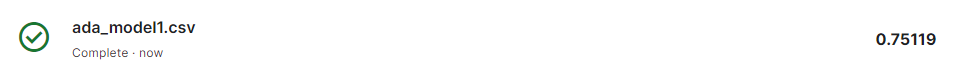

In [123]:
# 2-1. GBM 예측값 확인
pre3 = gdm.predict(X_test)

In [124]:
# 2-2. 답안지 파일 만들기 - 값 덮어씌워주기
rs['Survived'] = pre3

In [125]:
# 2-3. 캐글에 제출할 파일 만들어서 결과 확인하기
rs.to_csv('data/gdm1.csv', index=False)

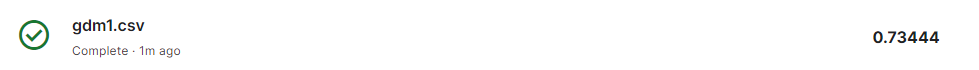

In [135]:
# 부스팅 알고리즘 사용해보기 - XGBoost / LightGBM
# XG boost / lightgbm은 별도의 설치 필요
# 설치 코드 
# ! -> anaconda prompt에 바로 연결해서 사용하겠다
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.5/99.8 MB 4.8 MB/s eta 0:00:21
   ---------------------------------------- 1.1/99.8 MB 6.8 MB/s eta 0:00:15
    --------------------------------------- 1.8/99.8 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 2.6/99.8 MB 10.4 MB/s eta 0:00:10
   - -------------------------------------- 3.5/99.8 MB 11.8 MB/s eta 0:00:09
   - -------------------------------------- 4.6/99.8 MB 13.4 MB/s eta 0:00:08
   -- ------------------------------------- 6.1/99.8 MB 15.5 MB/s eta 0:00:07
   --- ----------------------------

In [136]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 2.0 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 5.4 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.5 MB/s eta 0:00:00


In [137]:
# 모델 import 
from xgboost import XGBClassifier  # xgboost 분류모델
from lightgbm import LGBMClassifier # lightgbm 분류모델

In [138]:
# 모델 객체 생성
xgb = XGBClassifier(n_estimators=200, max_depth=5) 
lgb = LGBMClassifier(n_estimators=200, max_depth=5)

In [139]:
# 교차검증
rs_xgb = cross_val_score(xgb, X_train, y_train, cv=5)
print(rs_xgb)
print(rs_xgb.mean())

[0.79888268 0.80898876 0.85955056 0.79213483 0.85393258]
0.8226978846274561


In [140]:
# 교차검증
rs_lgb = cross_val_score(lgb, X_train, y_train, cv=5)
print(rs_lgb)
print(rs_lgb.mean())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 221
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [141]:
# 모델 학습
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [142]:
lgb.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

LGBMClassifier(max_depth=5, n_estimators=200)

In [147]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Pclass              418 non-null    int64 
 1   Age                 418 non-null    int64 
 2   SibSp               418 non-null    int64 
 3   Parch               418 non-null    int64 
 4   Fare                418 non-null    object
 5   Sex_female          418 non-null    bool  
 6   Sex_male            418 non-null    bool  
 7   Embarked_C          418 non-null    bool  
 8   Embarked_Q          418 non-null    bool  
 9   Embarked_S          418 non-null    bool  
 10  Deck_A              418 non-null    bool  
 11  Deck_B              418 non-null    bool  
 12  Deck_C              418 non-null    bool  
 13  Deck_D              418 non-null    bool  
 14  Deck_E              418 non-null    bool  
 15  Deck_F              418 non-null    bool  
 16  Deck_G              418 non-

In [148]:
# value_error > Fare(object) 에러인 경우
# X_test 'Fare' 컬럼이 object라서 오류가 난다 -> 타입 변경
X_test['Fare'] = X_test['Fare'].astype('float')

In [149]:
# xgb 예측값 확인
pre_xgb = xgb.predict(X_test)

In [152]:
# 답안지 작성
rs['Survived'] = pre_xgb

In [153]:
# 파일 확인 후 성능 확인해보기
rs.to_csv('data/xgb1.csv', index=False)

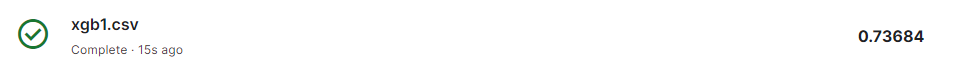

In [154]:
# lgb 예측값 확인
pre_lgb = lgb.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [155]:
# 답안지 작성
rs['Survived'] = pre_lgb

In [157]:
# 파일 확인 후 성능 확인해보기
rs.to_csv('data/lgb1.csv',index=False)

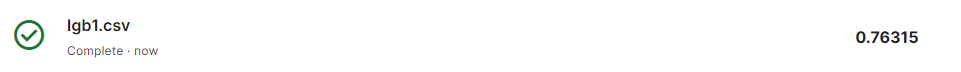

### 잊지 말자! 우리는 하이퍼파라미터를 제대로 튜닝한 적이 없다!
- 하이퍼 파라미터의 갯수가 많다... 이거 우리가 하나하나 살펴보기에는 시간이 부족하다.
- 하이퍼 파라미터 조합을 이용해서 성능을 측정해주는 도구를 사용해보자

In [158]:
# 하이퍼 파라미터 조합식을 구해주는 도구를 사용해보자
# Grid_Search 모델 import
# model_selection : 도구 모음집
from sklearn.model_selection import GridSearchCV

In [159]:
# 그리드 서치 모델에 사용할 트리모델 불러오기
tree = DecisionTreeClassifier()

In [166]:
# 그리드 서치에 사용할 하이퍼 파라미터 정리
# 딕셔너리 키값은 하이퍼 파라미터의 이름
# 밸류값은 하이퍼 파라미터 묶음 값
params = {'max_depth' : [1, 2, 3, 4, 5],
         'min_samples_split' : [100, 150, 200],
         'min_samples_leaf' : range(1, 6, 1)
         }

In [167]:
# 그리드 서치 모델 객체 생성 
grid = GridSearchCV(tree, 
                    param_grid=params,
                    cv = 5)

In [168]:
# 하이퍼 파라미터를 알아서 바꾸면서 학습 진행
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': [100, 150, 200]})

In [169]:
# 그리드 서치에서 찾은 최고의 조합식
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 100}

In [170]:
# 최고의 조합식을 적용한 모델의 교차검증 점수
grid.best_score_

0.8024668884564686

In [171]:
# 최고의 조합식을 적용한 모델 불러오기
grid_tree = grid.best_estimator_

In [172]:
grid_tree

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=100)

In [173]:
grid_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=100)

In [175]:
# 모델 예측
pre = grid_tree.predict(X_test)
pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [176]:
# 답안지 작성
rs['Survived'] = pre

In [177]:
rs.to_csv('data/grid_tree1.csv', index=False)

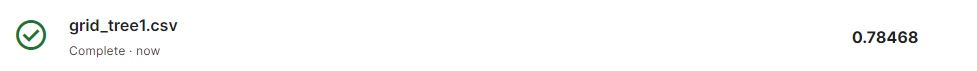

### 데이터 스케일링
- 상대적으로 KNN모델보다 Tree 기반의 모델들이 성능이 잘 나왔다. 
- 현재 데이터는 스케일링이 되어있지 않은  상태 : 모델이 불안정하다
- 스케일링을 적용해서 거리기반인 KNN모델이 작동을 잘 하도록 만들어보자

In [178]:
# 데이터 스케일 도구 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [179]:
# 스케일러 객체 만들기
mm_scale = MinMaxScaler()

In [180]:
# 스케일러 학습 - fit
# 데이터의 비율 7:3 -> 더 많은 데이터를 보유한 X_train으로 학습시키기
mm_scale.fit(X_train)

MinMaxScaler()

In [181]:
# 학습된 스케일러를 이용해서 값을 바꿔주기 - transform
X_train_mm = mm_scale.transform(X_train)
X_test_mm = mm_scale.transform(X_test)

In [182]:
X_train_mm

array([[1.    , 0.275 , 0.125 , ..., 0.    , 1.    , 0.    ],
       [0.    , 0.475 , 0.125 , ..., 0.    , 1.    , 0.    ],
       [1.    , 0.325 , 0.    , ..., 1.    , 0.    , 0.    ],
       ...,
       [1.    , 0.2625, 0.125 , ..., 0.    , 1.    , 0.    ],
       [0.    , 0.325 , 0.    , ..., 1.    , 0.    , 0.    ],
       [1.    , 0.4   , 0.    , ..., 1.    , 0.    , 0.    ]])

In [190]:
# knn 모델 사용하기
from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=3)

In [191]:
knn_mm.fit(X_train_mm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [192]:
# 교차검증
rs_mm = cross_val_score(knn_mm, X_train_mm, y_train, cv = 5)
print(rs_mm)
print(rs_mm.mean())

[0.74301676 0.75842697 0.82022472 0.78651685 0.82022472]
0.7856820036407005


In [189]:
# 스케일링 안 했을 때 교차검증
knn = KNeighborsClassifier(n_neighbors=3)
rs = cross_val_score(knn, X_train.values, y_train, cv = 5)
print(rs)
print(rs.mean())

[0.69832402 0.69662921 0.71348315 0.73595506 0.7247191 ]
0.7138221078400602


In [194]:
pre = knn_mm.predict(X_test_mm)
pre

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [195]:
omr = pd.read_csv('data/gender_submission.csv')
omr['Survived'] = pre

In [196]:
omr.to_csv('data/knn_mm01.csv', index=False)

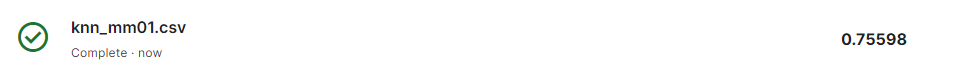